In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Customer Churn.csv' , lineterminator = '\n')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\r
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\r
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\r
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No\r
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes\r


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No\r
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No\r
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No\r
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes\r
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No\r


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replace blank with 0 as tenure is 0 and no total chaerges are recorded

In [13]:
df['TotalCharges'] = df['TotalCharges'].replace(" " , "0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# checking for null values

In [16]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn\r             0
dtype: int64


In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
df.duplicated().sum()

np.int64(0)

In [23]:
df['customerID'].duplicated().sum()

np.int64(0)

In [33]:
def convert(value):
     if value == 1 :
         return "Yes"
     else:
      return "No"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert)


#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

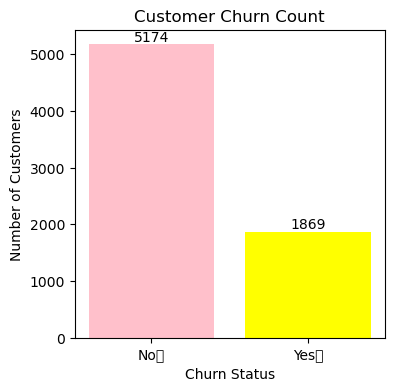

In [58]:
import warnings 
warnings.filterwarnings('ignore')
plt.figure(figsize = (4,4))

Churn_counts = df['Churn\r'].value_counts()
plt.bar(Churn_counts.index , Churn_counts.values , color = ['pink' , 'yellow'])
plt.title('Customer Churn Count')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')

for i , v in enumerate(Churn_counts.values):
  plt.text(i , v+60 , str(v) , ha='center' , fontsize = 10)
plt.show()

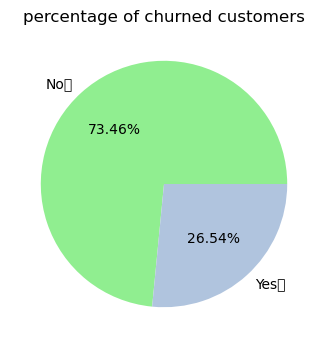

In [62]:
plt.figure(figsize = (4,4))
gb = df.groupby('Churn\r').agg({'Churn\r':'count'})
plt.pie(gb['Churn\r'] , labels = gb.index , autopct = "%1.2f%%" , colors=['lightgreen' , 'lightsteelblue'])
plt.title('percentage of churned customers')
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out.
#now let's explore the reasons behind it

<Figure size 300x300 with 0 Axes>

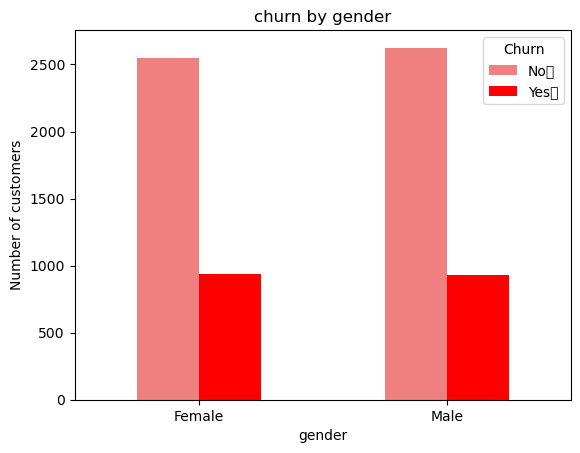

In [88]:
plt.figure(figsize = (3,3))
gender_churn = df.groupby(['gender' , 'Churn\r']).size().unstack()
gender_churn.plot(kind='bar' , color = ['lightcoral' , 'red'])
plt.title('churn by gender')
plt.xlabel('gender')
plt.ylabel('Number of customers')
plt.legend(title = 'Churn')
plt.xticks(rotation=0)
plt.show()

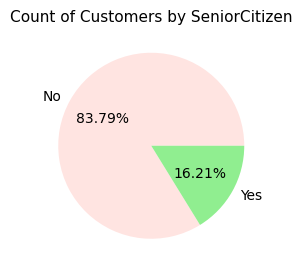

In [105]:
plt.figure(figsize = (3,4))
gb = df.groupby('SeniorCitizen').agg({'SeniorCitizen':'count'})
plt.pie(gb['SeniorCitizen'] , labels = gb.index , autopct = '%1.2f%%' , colors = ['mistyrose' , 'lightgreen'])
plt.title('Count of Customers by SeniorCitizen' , fontsize = 11)
plt.show()

<Figure size 300x300 with 0 Axes>

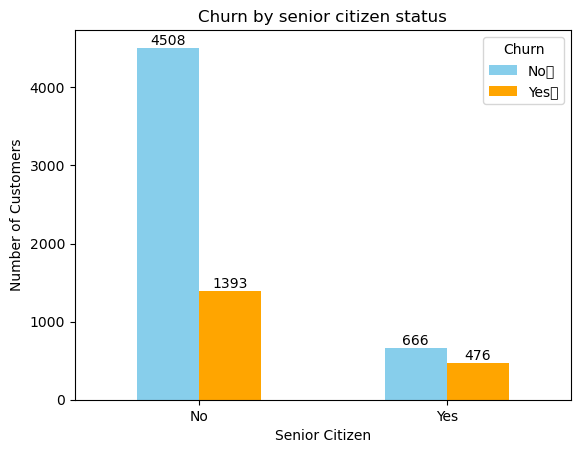

In [116]:
plt.figure(figsize = (3,3))
senior_churn = df.groupby(['SeniorCitizen' , 'Churn\r']).size().unstack()
plot = senior_churn.plot(kind = 'bar' , color = ['skyblue' , 'orange'])
plt.title('Churn by senior citizen status')
plt.xlabel('Senior Citizen')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn')
for bars in plot.containers:
    plt.bar_label(bars)
plt.xticks(rotation = 0)
plt.show()

#comparitevely a greater number of people in senior citizen have churned out.

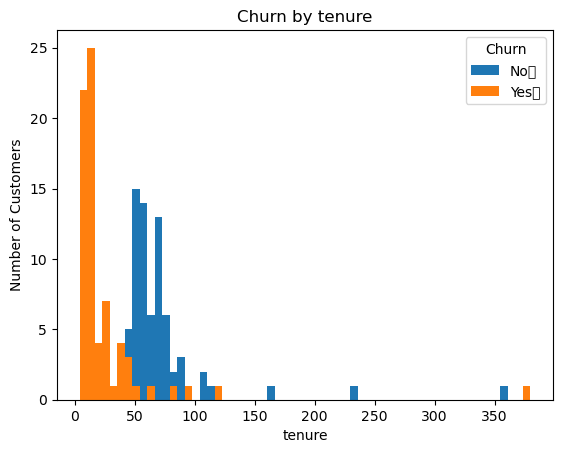

In [124]:
Churn_by_tenure = df.groupby(['tenure' , 'Churn\r']).size().unstack()
plot = Churn_by_tenure.plot(kind = 'hist' , bins=60)
plt.title('Churn by tenure')
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn')
plt.show()


#people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months
have churned out.

<Figure size 400x500 with 0 Axes>

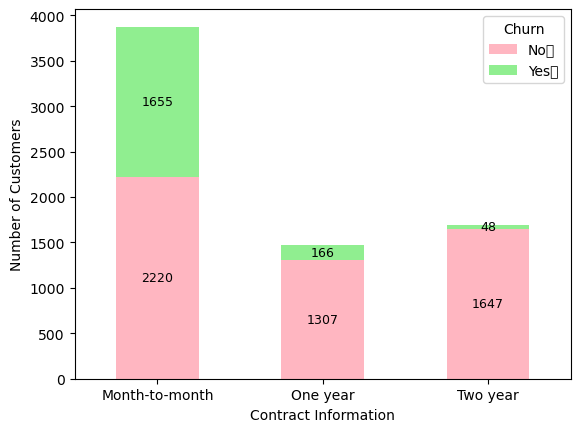

In [155]:
plt.figure(figsize = (4,5))
Contract_Distribution = df.groupby(['Contract' , 'Churn\r']).size().unstack()
ax = Contract_Distribution.plot(kind = 'bar' , stacked = True ,  color = ['lightpink' , 'lightgreen'])
plt.xlabel('Contract Information')
plt.ylabel('Number of Customers')
for container in ax.containers:
    ax.bar_label(container , label_type = 'center' , fontsize = 9)
plt.xticks(rotation = 0)
plt.legend(title = 'Churn')
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

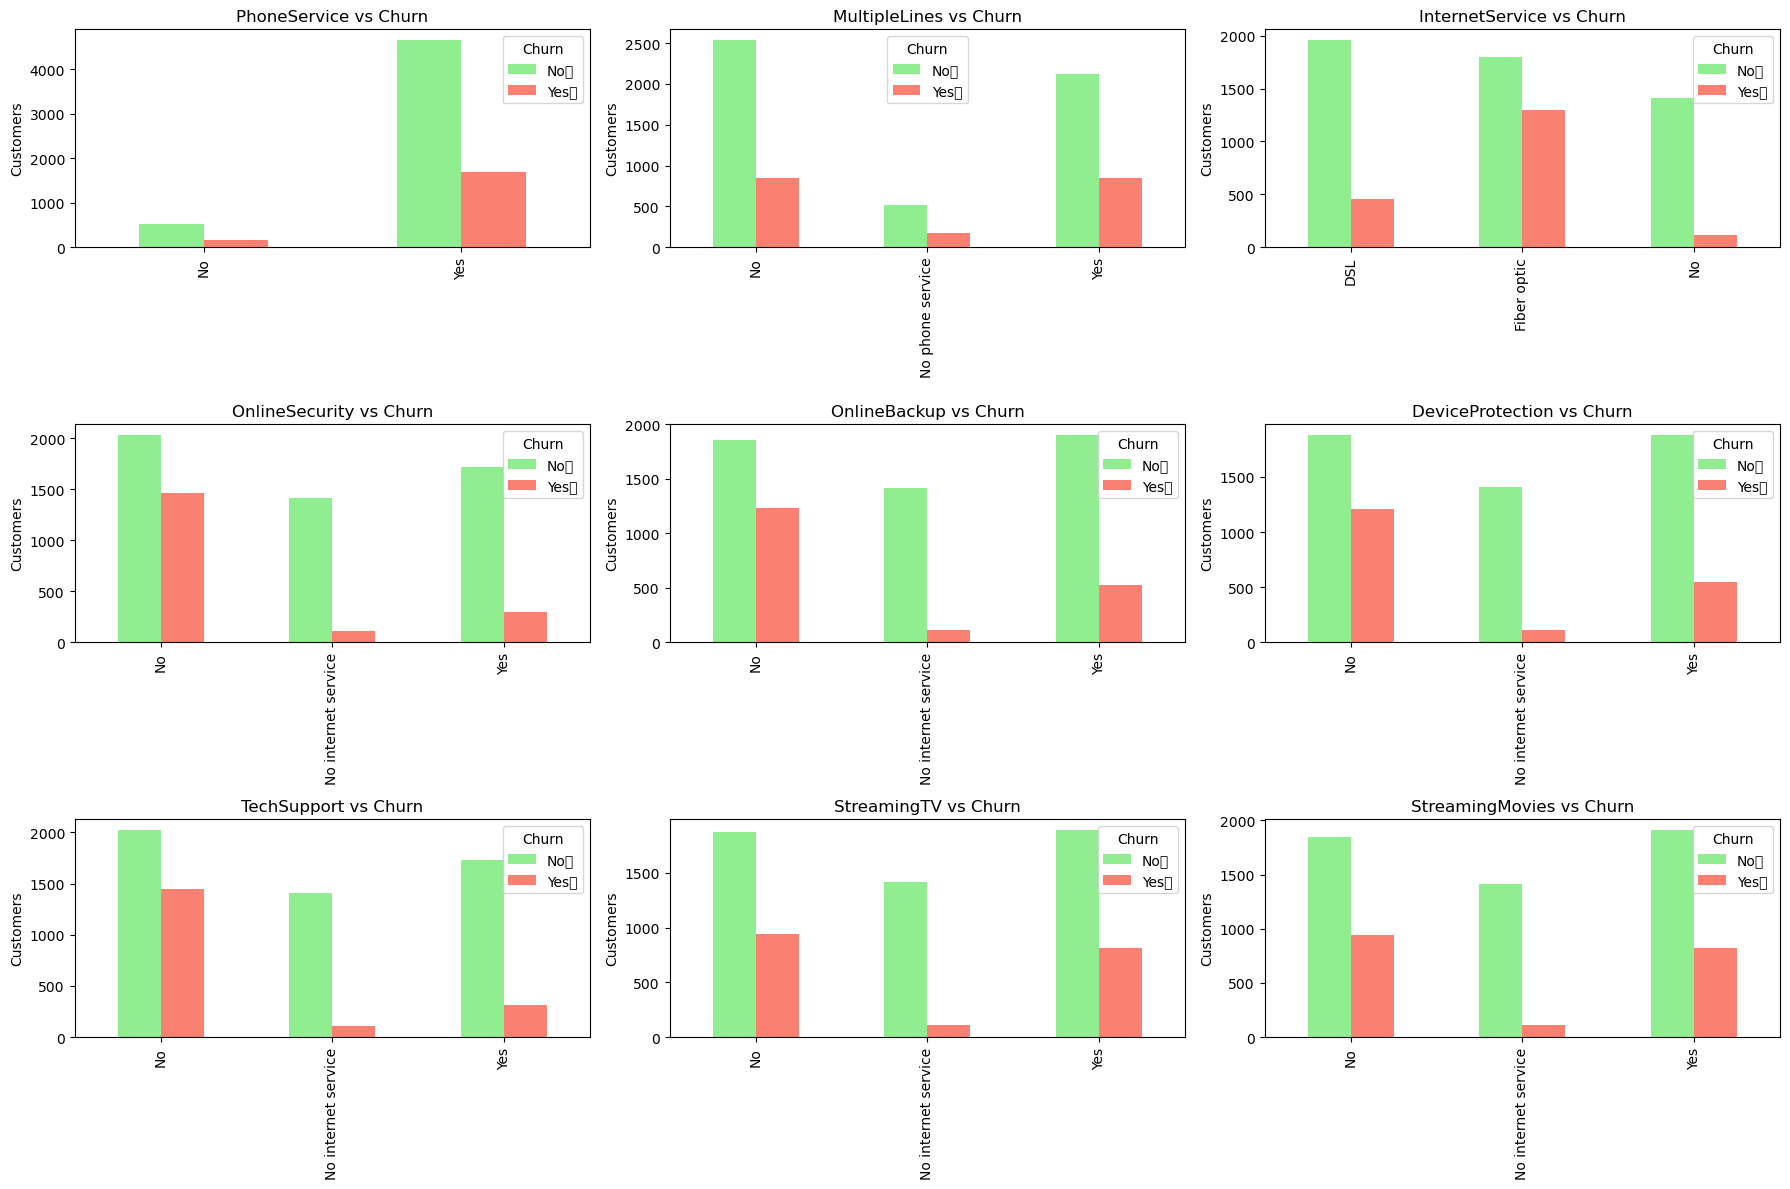

In [164]:
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten into 1D array for easy looping

for i, col in enumerate(service_cols):
    grouped = df.groupby([col, 'Churn\r']).size().unstack(fill_value=0)

    grouped.plot(kind='bar', ax=axes[i], color=['lightgreen', 'salmon'])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Customers")
    axes[i].legend(title="Churn")

plt.tight_layout()
plt.show()

#PhoneService and MultipleLines: Customers with these services show a mixed churn pattern, but churn is generally higher for customers with phone service.
#InternetService: Customers with Fiber Optic internet service have a notably high churn rate.
#OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport: Customers who do not subscribe to these additional internet-related services are significantly more likely to churn.
#StreamingTV and StreamingMovies: Similar to the other add-on services, customers without these streaming options show a higher tendency to churn.


<Figure size 400x400 with 0 Axes>

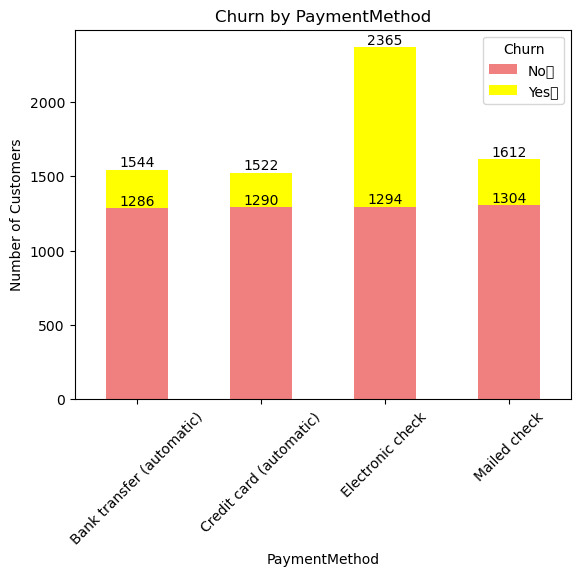

In [186]:
plt.figure(figsize= (4,4))
Churn_by_tenure = df.groupby(['PaymentMethod' , 'Churn\r']).size().unstack()
plot = Churn_by_tenure.plot(kind = 'bar' , stacked=True , color = ['lightcoral' , 'yellow'])
plt.title('Churn by PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn')
plt.xticks(rotation = 45)
for bars in plot.containers:
    plt.bar_label(bars)

plt.show()


#customer is likely to churn when he is using electronic check as payment method

<Figure size 400x300 with 0 Axes>

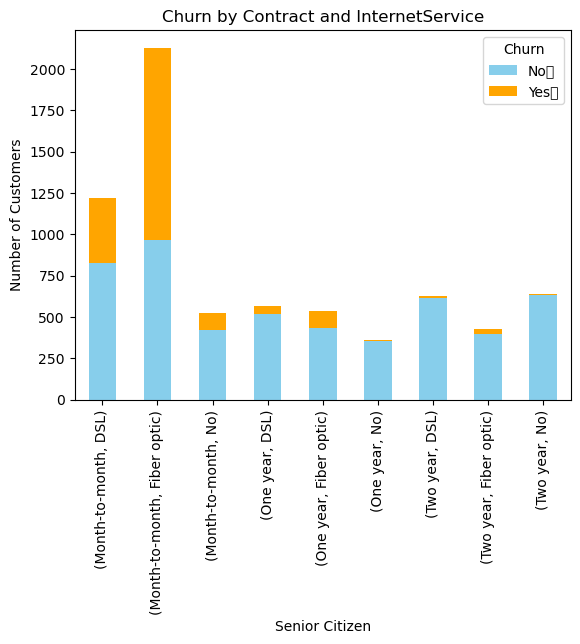

In [190]:
plt.figure(figsize = (4,3))
senior_churn = df.groupby(['Contract', 'InternetService' , 'Churn\r']).size().unstack()
plot = senior_churn.plot(kind = 'bar' , stacked = True , color = ['skyblue' , 'orange'])
plt.title('Churn by Contract and InternetService')
plt.xlabel('Senior Citizen')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn')
plt.xticks(rotation = 90)
plt.show()

#Customers on Month-to-Month contracts with fiber Optic internet have the highest churn rate.